In [13]:
source('K2methods.r')
library(bnstruct)
set.seed(9112001)

dataset = child()
dataset = impute(dataset)
data = imputed.data(dataset)

# create dataset in order to assign names
mode(data) = 'character'
DF = data.frame(data, stringsAsFactors = TRUE)

bnstruct :: performing imputation ...



bnstruct :: imputation finished.



In [14]:
dataset@variables = names(DF)
dataset@variables

[1] "V1"  "V2"  "V3"  "V4"  "V5"  "V6"  "V7"  "V8"  "V9"  "V10" "V11" "V12"
[13] "V13" "V14" "V15" "V16" "V17" "V18" "V19" "V20"

In [16]:
perm = sample(ncol(data)) 
cat(perm, '\n')

14 20 2 15 17 18 3 13 11 1 8 6 16 19 9 10 5 12 7 4 


In [17]:
DF_perm = DF[,perm]
head(DF_perm)

,V14,V20,V2,V15,V17,V18,V3,V13,V11,V1,V8,V6,V16,V19,V9,V10,V5,V12,V7,V4
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,2,2,3,2,3,2,3,1,1,2,1,3,2,1,2,1,1,1,1,2
2,2,2,4,1,2,1,2,2,2,2,2,2,2,2,2,1,1,1,1,1
3,2,2,3,2,2,1,1,2,2,2,2,3,1,2,2,1,1,2,1,2
4,2,2,4,1,1,1,1,1,3,2,1,3,3,1,2,1,1,1,1,1
5,2,2,2,2,1,1,1,1,3,2,1,4,1,2,1,1,2,1,1,2
6,2,2,2,2,1,1,1,3,3,2,3,4,2,3,2,1,1,1,1,2


In [19]:
layers = vector('integer', length = length(dataset@variables))

for (i in 1:length(layers)) {
    layers[i] = which(names(DF_perm) == dataset@variables[i])
}
layers

[1] 10  3  7 20 17 12 19 11 15 16  9 18  8  1  4 13  5  6 14  2

In [20]:
net = learn.network(dataset, layering = layers, algo = 'mmhc', scoring.func = 'BIC')

bnstruct :: learning the structure using MMHC ...



bnstruct :: learning using MMHC completed.

bnstruct :: learning network parameters ... 

bnstruct :: parameter learning done.



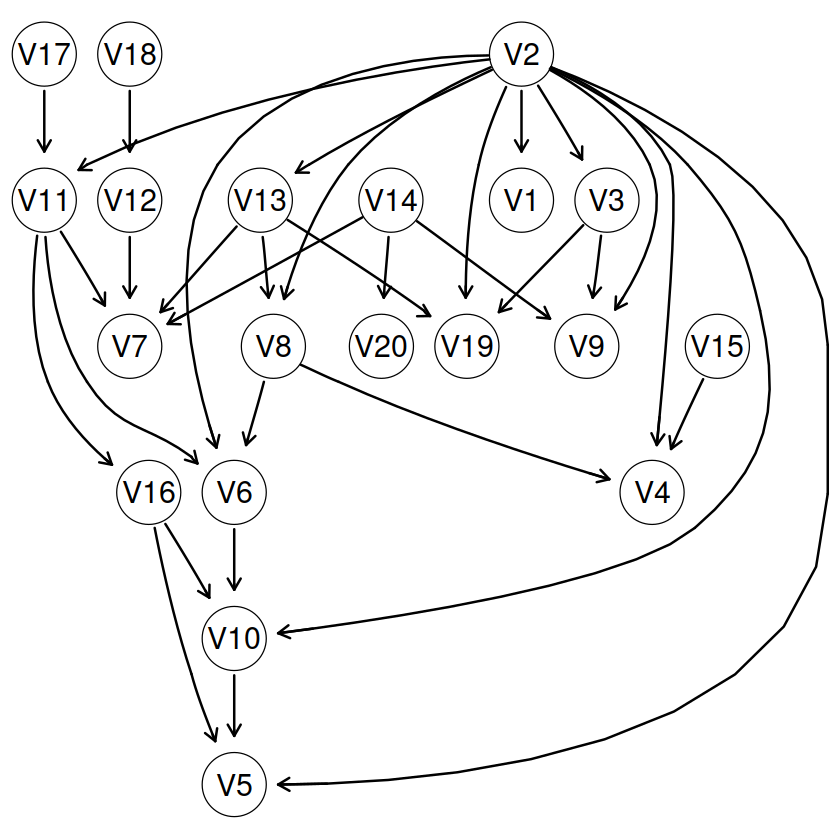

In [22]:
plot(net)

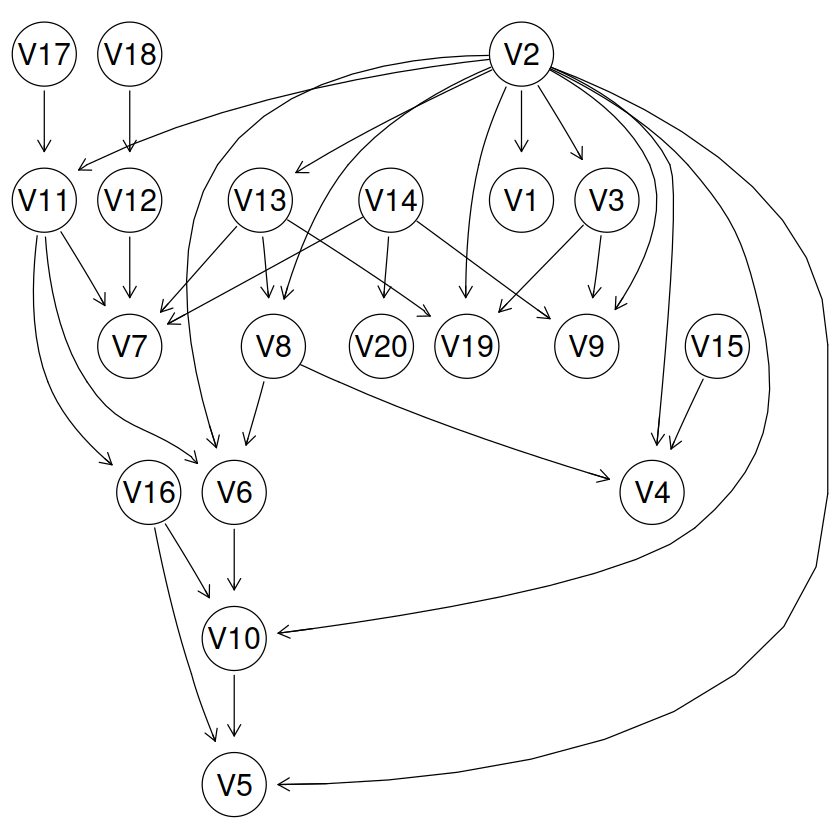

In [30]:
library(bnlearn)
net_bnl = empty.graph(dataset@variables)
amat(net_bnl) = dag(net)
graphviz.plot(net_bnl)

In [34]:
score(net_bnl, data = DF_perm, type = 'bic') # using DF is the same

[1] -65438.81